In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_m13_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        47.1127 (40.8312, 53.7817) (40.6988, 53.6357) 12.9369 (Jnode 202)\n',
 't_n104        41.9881 (34.7318, 49.4890) (34.5871, 49.3302) 14.7430 (Jnode 201)\n',
 't_n105        40.2398 (33.2527, 47.4629) (33.2145, 47.4193) 14.2048 (Jnode 200)\n',
 't_n106        36.3420 (29.9529, 42.9682) (29.8388, 42.8371) 12.9983 (Jnode 199)\n',
 't_n107        35.1506 (28.9621, 41.5846) (28.8480, 41.4446) 12.5965 (Jnode 198)\n',
 't_n108        33.0395 (27.2025, 39.1258) (27.1648, 39.0799) 11.9150 (Jnode 197)\n',
 't_n109        18.5589 (14.9439, 22.4218) (14.8209, 22.2844)  7.4635 (Jnode 196)\n',
 't_n110        18.3841 (14.8015, 22.2135) (14.6580, 22.0536)  7.3956 (Jnode 195)\n',
 't_n111        17.8009 (14.3254, 21.5156) (14.2854, 21.4664)  7.1810 (Jnode 194)\n',
 't_n112        17.0645 (13.7195, 20.6421) (13.6496, 20.5573)  6.9077 (Jnode 193)\n',
 't_n113        16.3889 (13.1660, 19.8367) (13.1143, 19.7752)  6.6609 (Jnode 192)\n',
 't_n114        12.2338 ( 9.5846, 15.0852) ( 9.5209, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[47.1127,
 41.9881,
 40.2398,
 36.342,
 35.1506,
 33.0395,
 18.5589,
 18.3841,
 17.8009,
 17.0645,
 16.3889,
 12.2338,
 8.9136,
 6.7576,
 3.7045,
 12.8304,
 10.8227,
 17.0898,
 11.2016,
 16.3676,
 13.0857,
 10.6399,
 9.4892,
 15.8684,
 14.8346,
 4.2866,
 17.5669,
 15.8489,
 12.3888,
 9.9122,
 11.5162,
 10.4206,
 8.721,
 8.9553,
 30.6535,
 24.971,
 33.3608,
 30.3128,
 27.8128,
 22.8536,
 12.4301,
 22.341,
 19.2431,
 17.0006,
 14.2381,
 27.43,
 25.0686,
 6.7454,
 3.1099,
 37.2874,
 34.8383,
 31.0322,
 30.3313,
 32.559,
 21.5582,
 26.9906,
 20.9604,
 40.7559,
 38.1859,
 34.5771,
 32.1836,
 27.4447,
 18.6865,
 23.9686,
 33.6663,
 12.21,
 33.9184,
 21.7254,
 20.763,
 19.9037,
 18.6783,
 17.151,
 16.2955,
 15.5422,
 14.6961,
 13.0479,
 11.2752,
 9.4141,
 13.1381,
 12.3229,
 9.8558,
 10.8702,
 14.5478,
 13.3291,
 12.1322,
 10.4343,
 7.2445,
 13.5434,
 12.1531,
 10.5629,
 16.1457,
 15.2589,
 14.1568,
 12.5146,
 9.1636,
 14.2102,
 8.8564,
 6.91,
 2.6243,
 21.0448,
 17.8916]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m13_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[47.2527,
 42.4818,
 40.3045,
 36.2126,
 34.8273,
 31.8912,
 18.2936,
 18.0533,
 17.1772,
 16.2904,
 15.404,
 11.4467,
 8.3035,
 6.1082,
 3.5016,
 11.9608,
 9.8598,
 16.2446,
 10.624,
 15.3898,
 12.1856,
 9.7074,
 9.0555,
 15.0873,
 13.9324,
 4.4463,
 17.034,
 15.1519,
 11.7642,
 9.339,
 10.9314,
 9.6844,
 7.9224,
 8.8521,
 29.4591,
 24.2295,
 32.6789,
 29.3278,
 26.4383,
 21.4309,
 11.8666,
 21.1109,
 17.78,
 15.2675,
 12.5322,
 26.5513,
 23.9539,
 7.5319,
 3.4592,
 36.3213,
 33.0497,
 28.6325,
 28.0656,
 31.2765,
 20.8589,
 25.5634,
 19.3773,
 40.9551,
 38.0084,
 33.8135,
 31.019,
 26.2459,
 18.479,
 22.5194,
 33.0729,
 12.6622,
 33.6801,
 23.0631,
 21.6867,
 20.486,
 19.026,
 17.1759,
 16.1321,
 15.2183,
 14.0972,
 12.2463,
 10.3966,
 8.666,
 12.5072,
 11.567,
 9.12,
 9.9068,
 14.0184,
 12.5687,
 11.2033,
 9.4167,
 6.5114,
 12.7319,
 11.26,
 9.6427,
 15.829,
 14.5918,
 13.3216,
 11.4981,
 8.2463,
 13.6989,
 8.3721,
 6.377,
 2.5228,
 22.079,
 18.6725]

In [12]:
posterior_mean_iqtree

[47.1127,
 41.9881,
 40.2398,
 36.342,
 35.1506,
 33.0395,
 18.5589,
 18.3841,
 17.8009,
 17.0645,
 16.3889,
 12.2338,
 8.9136,
 6.7576,
 3.7045,
 12.8304,
 10.8227,
 17.0898,
 11.2016,
 16.3676,
 13.0857,
 10.6399,
 9.4892,
 15.8684,
 14.8346,
 4.2866,
 17.5669,
 15.8489,
 12.3888,
 9.9122,
 11.5162,
 10.4206,
 8.721,
 8.9553,
 30.6535,
 24.971,
 33.3608,
 30.3128,
 27.8128,
 22.8536,
 12.4301,
 22.341,
 19.2431,
 17.0006,
 14.2381,
 27.43,
 25.0686,
 6.7454,
 3.1099,
 37.2874,
 34.8383,
 31.0322,
 30.3313,
 32.559,
 21.5582,
 26.9906,
 20.9604,
 40.7559,
 38.1859,
 34.5771,
 32.1836,
 27.4447,
 18.6865,
 23.9686,
 33.6663,
 12.21,
 33.9184,
 21.7254,
 20.763,
 19.9037,
 18.6783,
 17.151,
 16.2955,
 15.5422,
 14.6961,
 13.0479,
 11.2752,
 9.4141,
 13.1381,
 12.3229,
 9.8558,
 10.8702,
 14.5478,
 13.3291,
 12.1322,
 10.4343,
 7.2445,
 13.5434,
 12.1531,
 10.5629,
 16.1457,
 15.2589,
 14.1568,
 12.5146,
 9.1636,
 14.2102,
 8.8564,
 6.91,
 2.6243,
 21.0448,
 17.8916]

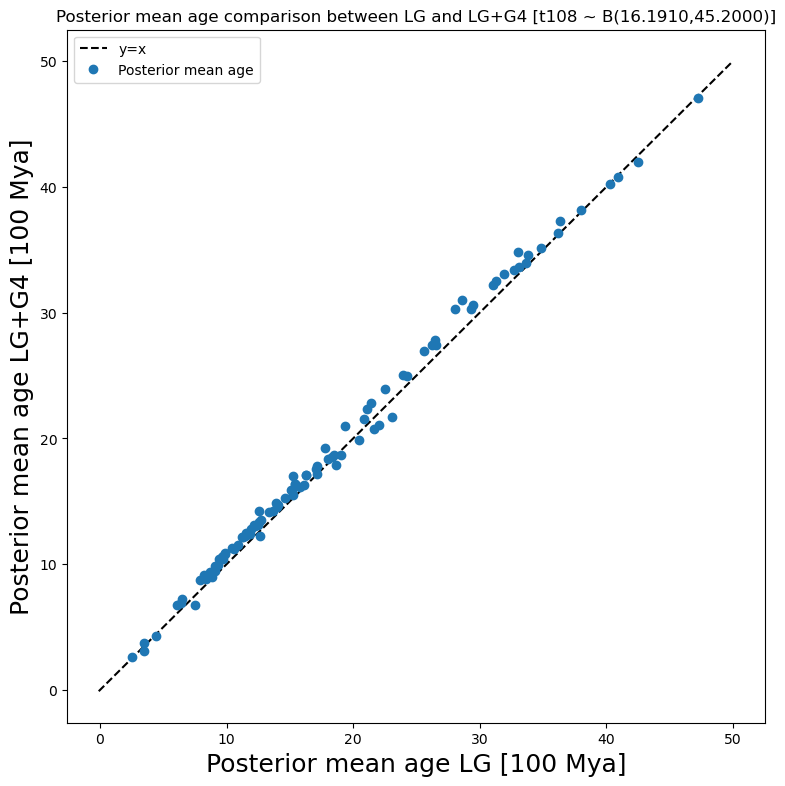

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_m13_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')